In [1]:
import acquire
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# using out acquire module to read the data from the sql database. A copy of the data is stored in the local repo as well

df = acquire.get_data()



In [3]:
# df = df.drop(columns = 'parcelid')

In [4]:
# check the number of null values in the dataframe by column
(df.isnull().sum()/len(df)) * 100

id                           0.000000
parcelid                     0.000000
airconditioningtypeid       67.766812
architecturalstyletypeid    99.733898
basementsqft                99.935412
                              ...    
taxdelinquencyyear          96.271992
censustractandblock          0.357816
parcelid                     0.000000
logerror                     0.000000
transactiondate              0.000000
Length: 62, dtype: float64

In [5]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,parcelid,logerror
count,7.741400e+04,7.741400e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,76772.000000,...,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,7.741400e+04,77414.000000
mean,1.495774e+06,1.300670e+07,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,2.316867,...,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,1.300670e+07,0.016578
std,8.612720e+05,3.480690e+06,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,0.979755,...,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,3.480690e+06,0.170342
min,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,...,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,1.071186e+07,-4.655420
25%,7.524398e+05,1.153834e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,...,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,1.153834e+07,-0.024387
50%,1.498474e+06,1.253072e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,...,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,1.253072e+07,0.006624
75%,2.241722e+06,1.421149e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,3.000000,...,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,1.421149e+07,0.039211
max,2.985182e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,18.000000,...,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,1.676893e+08,5.262999


In [6]:
# there were two columns with the same name: parcelid. So, we must drop one without affecting the other one

df = df.loc[:,~df.columns.duplicated()]

In [7]:
print(len(df))
df[df.isnull().any(axis = 1)]


77414


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,485713.0,1023282.0,2016.0,537569.0,11013.72,None,NaN,6.059063e+13,0.025595,2017-01-01
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,None,NaN,6.111001e+13,0.055619,2017-01-01
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,None,NaN,6.059022e+13,0.005383,2017-01-01
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,None,NaN,6.037300e+13,-0.103410,2017-01-01
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,None,NaN,6.037124e+13,0.006940,2017-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,70917.0,354621.0,2016.0,283704.0,4478.43,None,NaN,6.037101e+13,0.020615,2017-09-20
77410,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,50683.0,67205.0,2016.0,16522.0,1107.48,None,NaN,6.111008e+13,0.013209,2017-09-21
77411,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,32797.0,49546.0,2016.0,16749.0,876.43,None,NaN,6.037434e+13,0.037129,2017-09-21
77412,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,140000.0,522000.0,2016.0,382000.0,6317.15,None,NaN,6.037503e+13,0.007204,2017-09-25


In [8]:
for col in df.columns:
    print(df[col].value_counts())
    print()

657407     1
2132676    1
2267846    1
2677936    1
1374922    1
          ..
648470     1
1699095    1
2069784    1
1285401    1
2392597    1
Name: id, Length: 77414, dtype: int64

12086286    1
11077074    1
12714581    1
12458582    1
12063319    1
           ..
11521363    1
12145831    1
11271509    1
17294678    1
14298875    1
Name: parcelid, Length: 77414, dtype: int64

1.0     23133
13.0     1574
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64

7.0     172
8.0      19
21.0      7
2.0       5
3.0       3
Name: architecturalstyletypeid, dtype: int64

700.0     2
515.0     2
900.0     2
912.0     2
640.0     2
273.0     2
100.0     2
3560.0    1
669.0     1
252.0     1
405.0     1
674.0     1
600.0     1
394.0     1
396.0     1
819.0     1
786.0     1
3112.0    1
1809.0    1
645.0     1
512.0     1
204.0     1
168.0     1
380.0     1
352.0     1
254.0     1
280.0     1
314.0     1
1252.0    1
112.0     1
126.0     1
800.0     1
1218.0    1
384.

Name: transactiondate, Length: 265, dtype: int64



In [9]:
df.parcelid.value_counts()

12086286    1
11077074    1
12714581    1
12458582    1
12063319    1
           ..
11521363    1
12145831    1
11271509    1
17294678    1
14298875    1
Name: parcelid, Length: 77414, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77414 non-null  int64  
 1   parcelid                      77414 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77381 non-null  float64
 6   bedroomcnt                    77381 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49672 non-null  float64
 9   calculatedbathnbr             76772 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77185 non-null  float64
 13  f

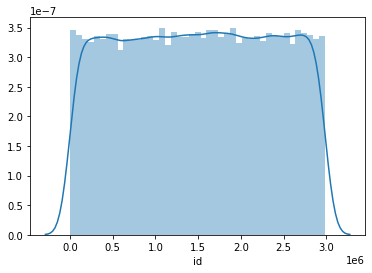

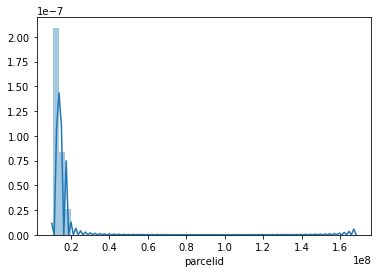

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


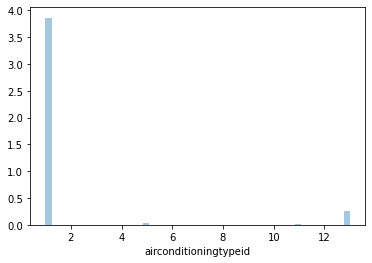

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


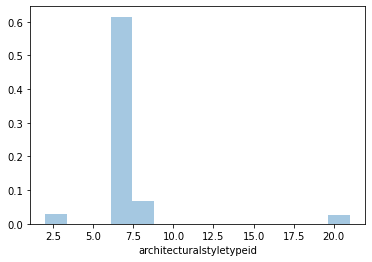

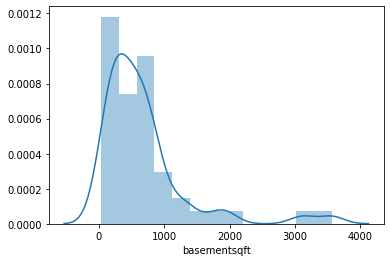

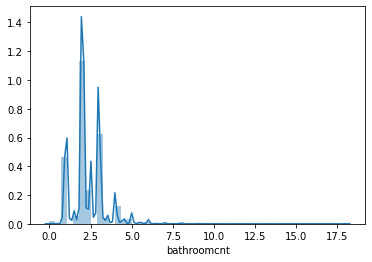

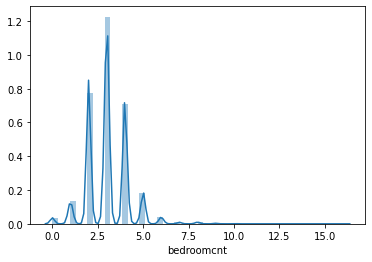

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


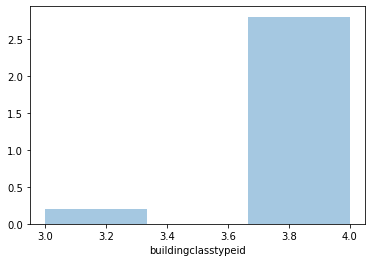

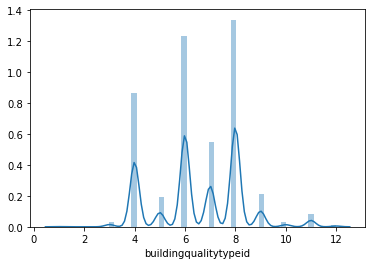

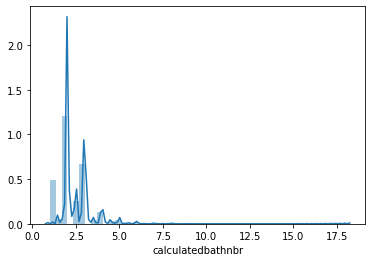

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


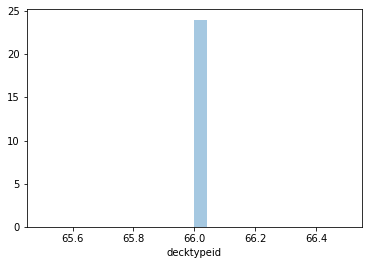

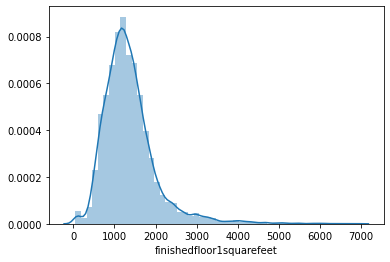

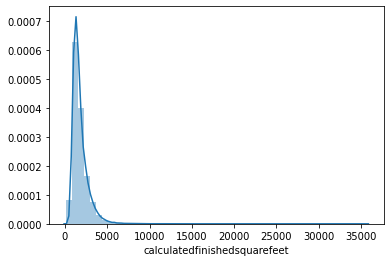

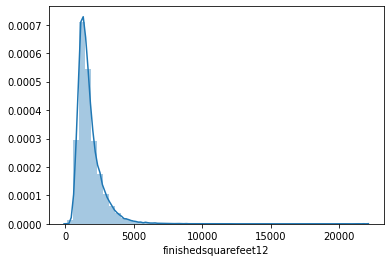

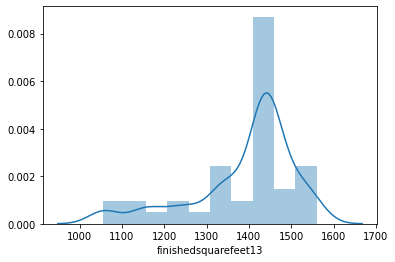

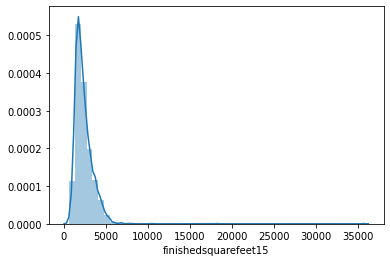

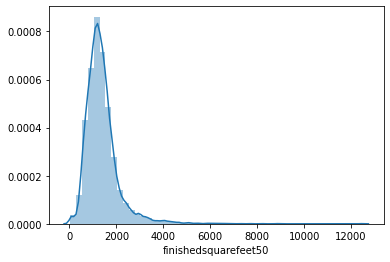

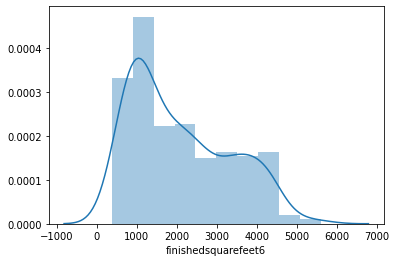

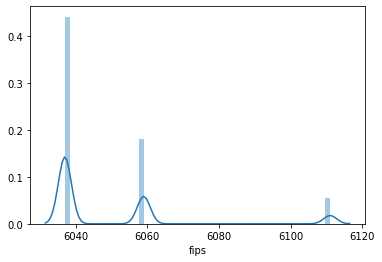

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


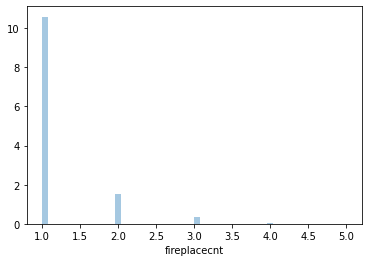

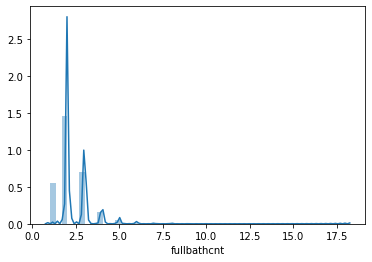

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


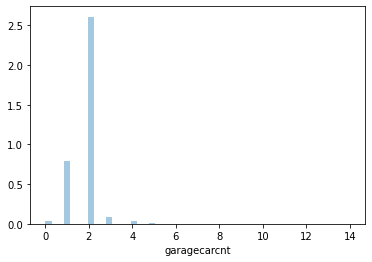

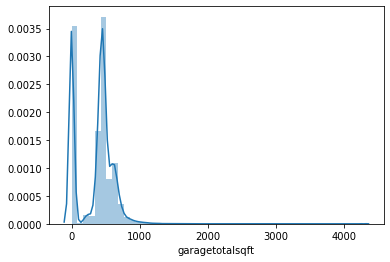

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


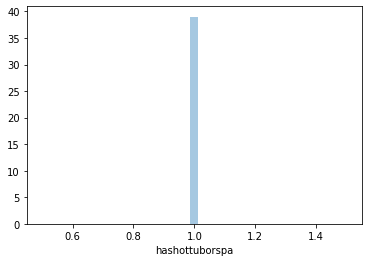

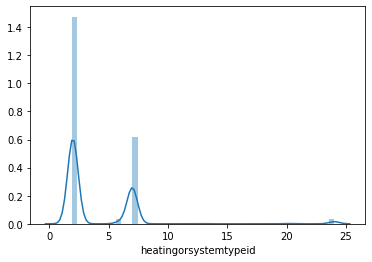

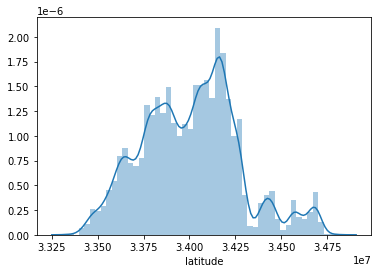

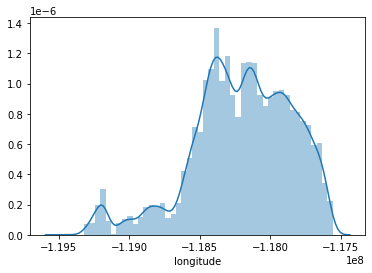

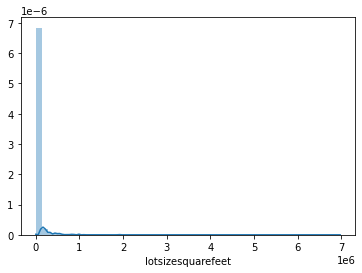

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


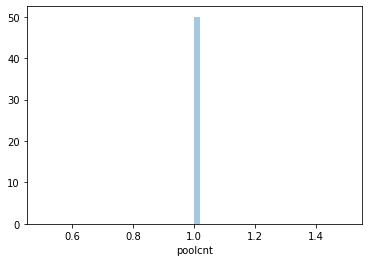

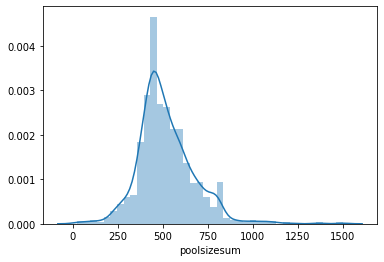

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


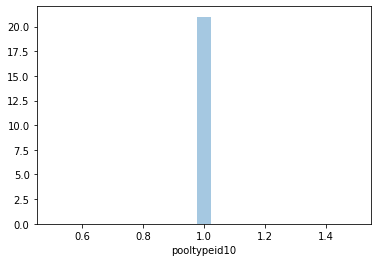

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


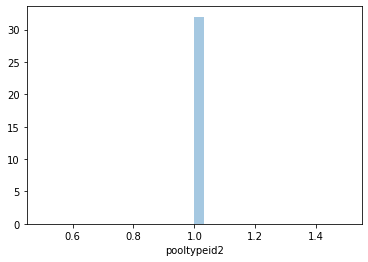

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


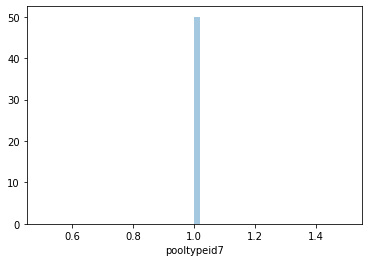

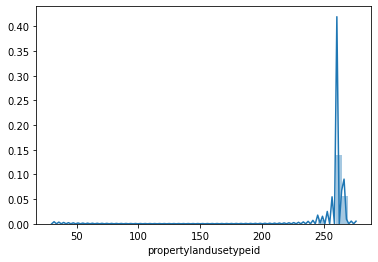

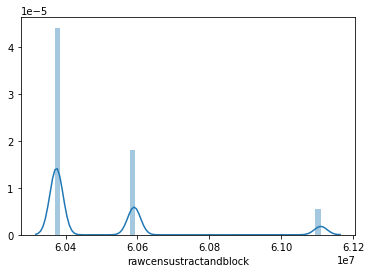

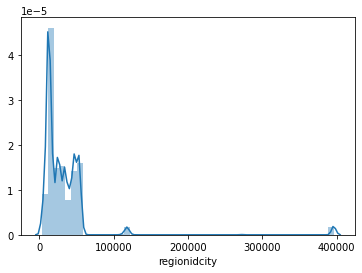

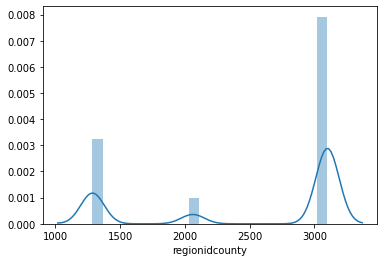

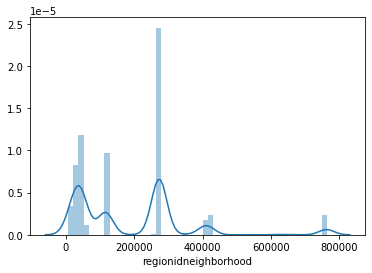

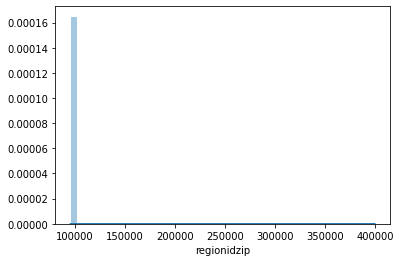

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


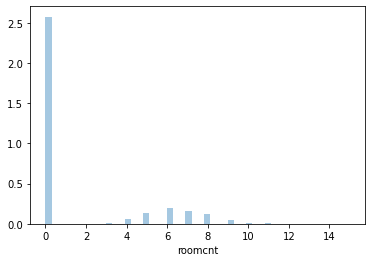

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


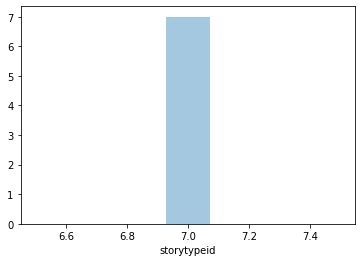

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


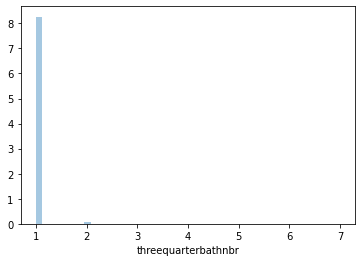

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


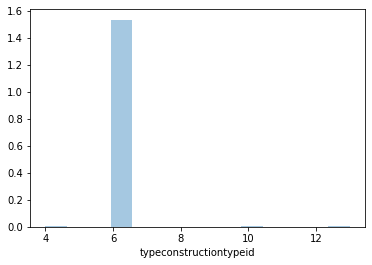

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


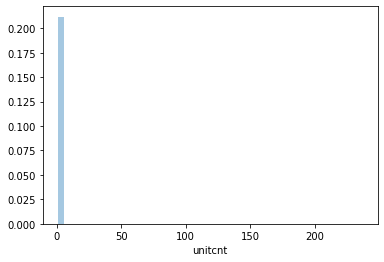

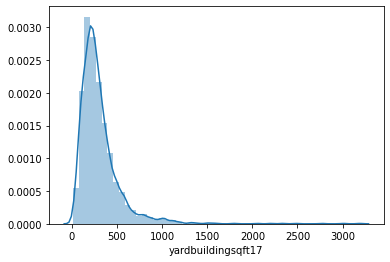

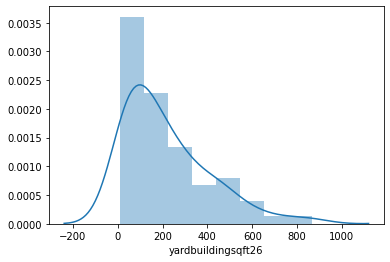

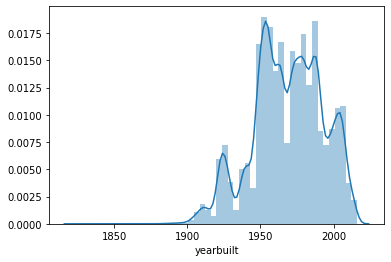

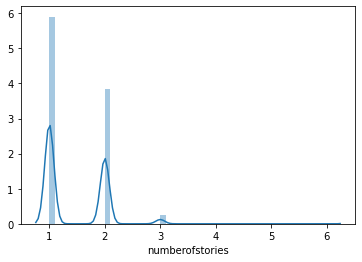

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


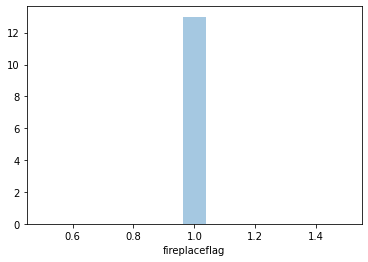

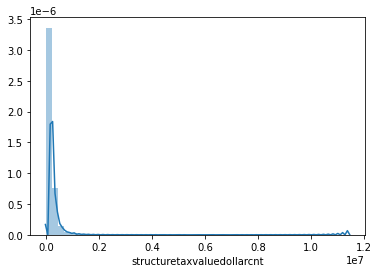

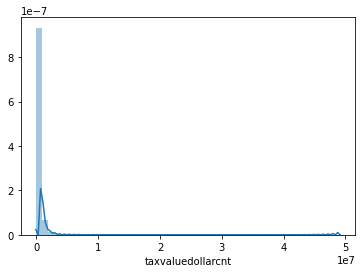

/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


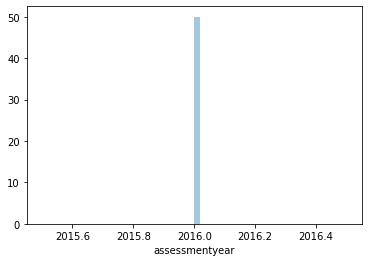

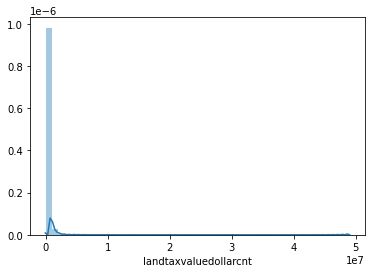

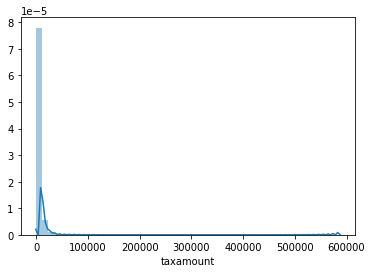

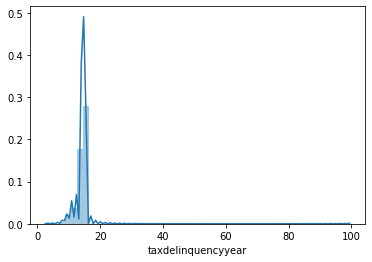

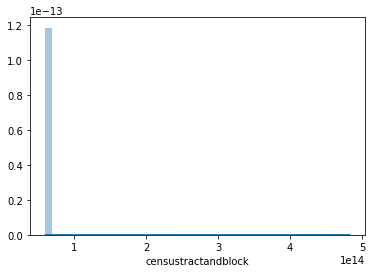

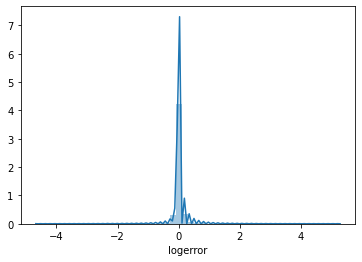

In [11]:
# lets plot the distribution of the data

for col in df.select_dtypes('number').columns:
    sns.distplot(df[col])
    plt.show()

In [12]:
# df.select_dtypes() allows you to filter by the data type in your data frame. Arguments for this method is:
# include and exclude

print(df.select_dtypes(include = 'number'))
print(df.select_dtypes(exclude = 'number'))

            id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      1727539  14297519                    NaN                       NaN   
1      1387261  17052889                    NaN                       NaN   
2        11677  14186244                    NaN                       NaN   
3      2288172  12177905                    NaN                       NaN   
4      1970746  10887214                    1.0                       NaN   
...        ...       ...                    ...                       ...   
77409   673515  11000655                    NaN                       NaN   
77410  2968375  17239384                    NaN                       NaN   
77411  1843709  12773139                    1.0                       NaN   
77412  1187175  12826780                    NaN                       NaN   
77413  2455685  13083743                    NaN                       NaN   

       basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0     

### Creating a dataframe with the name of the columns, number of missing rows in that columns, and pct of missing rows

In [13]:
summary_df = pd.DataFrame( columns = ['Number of rows missing', "pct of rows missing"], index = [df.columns])

In [14]:
summary_df['Number of rows missing'] = list(df.isnull().sum())

In [15]:
summary_df['pct of rows missing'] = (summary_df['Number of rows missing']/len(df)) * 100

In [16]:
summary_df

,Number of rows missing,pct of rows missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52461,67.766812
architecturalstyletypeid,77208,99.733898
basementsqft,77364,99.935412
...,...,...
taxdelinquencyflag,74528,96.271992
taxdelinquencyyear,74528,96.271992
censustractandblock,277,0.357816
logerror,0,0.000000


### Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [18]:
cols_summary = pd.DataFrame(df.isnull().sum(axis = 1).value_counts())
cols_summary = cols_summary.reset_index()
cols_summary = cols_summary.rename(columns = {'index': 'num_cols_missing'})

cols_summary['pct_cols_missing'] = (cols_summary.num_cols_missing/len(df.columns)) * 100

cols_summary = cols_summary.rename(columns = {0:'num_rows'})

cols_summary

,num_cols_missing,num_rows,pct_cols_missing
0,28,20660,45.901639
1,29,16098,47.540984
2,27,12410,44.262295
3,26,7996,42.622951
4,30,6391,49.180328
5,25,5768,40.983607
6,31,3604,50.819672
7,32,2089,52.459016
8,24,660,39.344262
9,23,599,37.704918
